##**Q1) CUTLETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
upload = files.upload()

import warnings
warnings.filterwarnings('ignore')

Saving Cutlets.csv to Cutlets (2).csv


In [ ]:
cutlet=pd.read_csv('Cutlets.csv')
cutlet.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
cutlet['Unit A'].skew()

-0.12368390249006213

In [ ]:
cutlet['Unit B'].skew()

-0.379945149223563

(array([2., 2., 2., 5., 7., 2., 3., 5., 5., 2.]),
 array([6.4376 , 6.54553, 6.65346, 6.76139, 6.86932, 6.97725, 7.08518,
        7.19311, 7.30104, 7.40897, 7.5169 ]),
 <BarContainer object of 10 artists>)

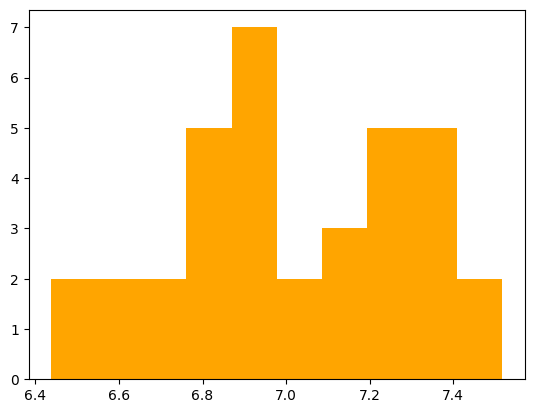

In [ ]:
plt.hist(cutlet['Unit A'], color = 'orange')

(array([1., 1., 0., 2., 9., 5., 3., 7., 2., 5.]),
 array([6.038  , 6.18879, 6.33958, 6.49037, 6.64116, 6.79195, 6.94274,
        7.09353, 7.24432, 7.39511, 7.5459 ]),
 <BarContainer object of 10 artists>)

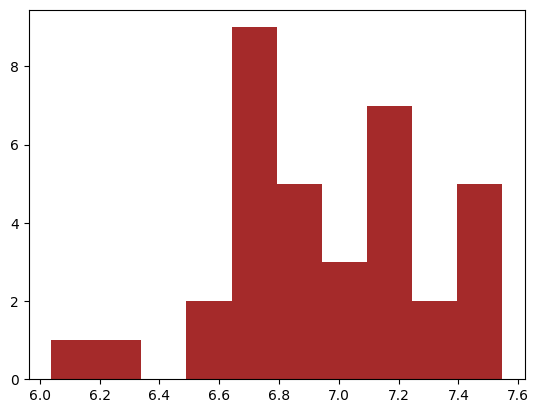

In [ ]:
plt.hist(cutlet['Unit B'], color = 'brown')

###**NULL HYPOTHESIS:** There is no significant difference between the diameter of the cutlets from the two outlets
###**ALTERNATE HYPOTHESIS:** There is significant difference between the diameter of the cutlets from the two outlets

###If the p_value is **less than 0.05** then the **alternate hypothesis** is accepted and if the P_value is **greater than 0.05** then the **Null Hypothesis** is accepted

In [ ]:
#T-test for getting P_value
stats.ttest_ind(cutlet['Unit A'],cutlet['Unit B'])[1]

0.4722394724599501

###In this case the P_value is greater than 0.05, P_value is 0.472. So the Null Hypothesis is accepted that means, There is no significant Difference between the diameter of the cutlets from the two outlets

##**Q2) LAB_TAT**

In [ ]:
upload=files.upload()

Saving LabTAT.csv to LabTAT (1).csv


In [ ]:
data=pd.read_csv('LabTAT.csv')
data.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


###NULL HYPOTHESIS-->There is no any difference in average TAT among the different laboratories

###ALTERNATE HYPOTHESIS-->There is difference in average TAT among the different laborataries

In [ ]:
#f_test for finding p_value
stats.f_oneway(data['Laboratory 1'],data['Laboratory 2'],data['Laboratory 3'],data['Laboratory 4'])[1]

2.1156708949992414e-57

###Reject null hypothesis,
There is difference in average TAT Among the different laborataries

##**Q3) Buyer_Ratio**

In [ ]:
upload=files.upload()

Saving BuyerRatio.csv to BuyerRatio (1).csv


In [ ]:
data=pd.read_csv('BuyerRatio.csv')
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


###**NULL_Hypothesis:** All propotions are equal
###**Alter_Hypothesis:** Not all propotions are equal

In [ ]:
from scipy.stats import chi2_contingency
observed_values=np.array([[50,142,131,70],[435,1523,1356,750]])
stats.chi2_contingency(observed_values)

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

Since the p-value is greater than Alpha,**we accept Null Hypothesis**


##**Q4) CUSTOMER_ORDER_FORM**

In [ ]:
upload=files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm (1).csv


In [ ]:
data=pd.read_csv('Costomer+OrderForm.csv')
data.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Phillippines']=le.fit_transform(data['Phillippines'])
data['Indonesia']=le.fit_transform(data['Indonesia'])
data['Malta']=le.fit_transform(data['Malta'])
data['India']=le.fit_transform(data['India'])

In [ ]:
data.head()

,Phillippines,Indonesia,Malta,India
0,1,1,0,1
1,1,1,1,0
2,1,0,0,1
3,1,1,1,1
4,1,1,0,1


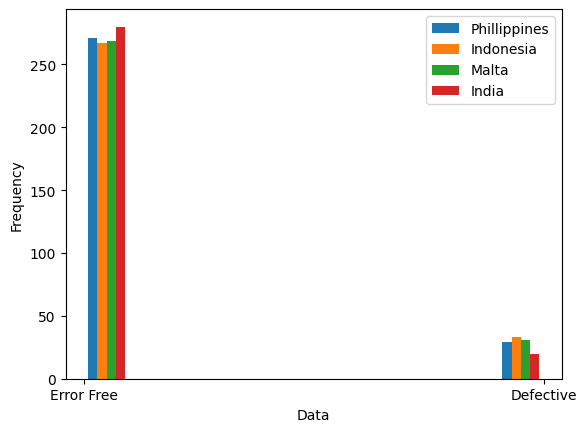

In [ ]:
plt.hist(data)
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.legend(data)
plt.show()

###**NULL HYPOTHESIS**-->The defective % does not varies by centre

###**ALTERNATE HYPOTHESIS**-->The defective % will varies by centre

In [ ]:
stats.f_oneway(data['Phillippines'],data['Indonesia'],data['Malta'],data['India'])


F_onewayResult(statistic=1.286168556089167, pvalue=0.2776780955705948)

### Reject null hypothesis
The defective % will varies by centre